# Synthetic Dataset Training: Basic

## Feed Forward Neural Network

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [71]:
##### Construct a model #####

class FFN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input = nn.Linear(input_size, 200)
        self.hidden1 = nn.Linear(200, 200)
        self.hidden2 = nn.Linear(200, 200)
        self.output = nn.Linear(200, 1)

    def forward(self, input):
        output = self.input(input)
        output = F.relu(output)
        output = self.hidden1(output)
        output = F.relu(output)
        output = self.hidden2(output)
        output = F.relu(output)
        output = self.output(output)
        return output

$$y[i] = 1.008^{x[i]} - \sin(x[i])$$

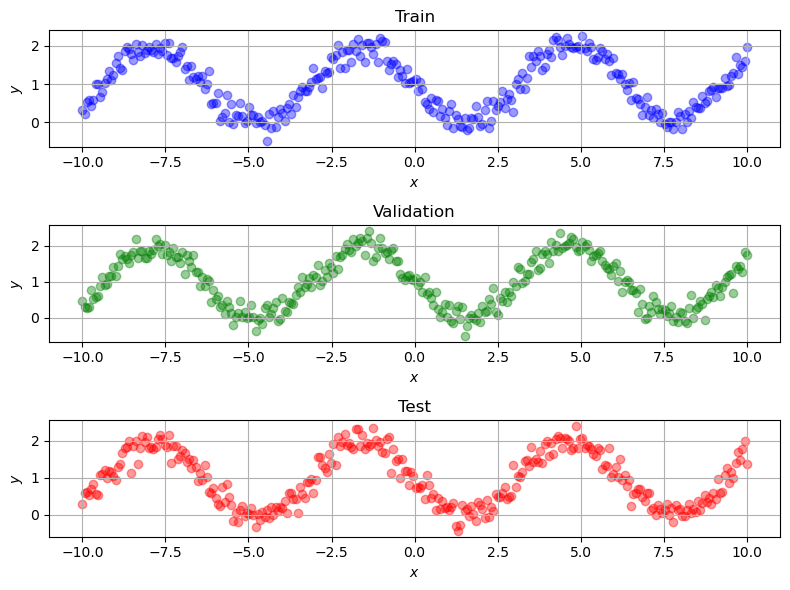

In [72]:
##### Input #####
x = torch.linspace(-10, 10, 300).unsqueeze(1)

##### Output #####

torch.manual_seed(21)
y_noiseless = 1.008 ** x - torch.sin(x)
y_train = y_noiseless +  0.2 * torch.randn(y_noiseless.shape)
y_val = y_noiseless + 0.2 * torch.randn(y_noiseless.shape)
y_test = y_noiseless + 0.2 * torch.randn(y_noiseless.shape)

##### Visualize #####
fig1, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].scatter(x.numpy(), y_train.numpy(), c='blue', alpha=0.4)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_title('Train')
ax[0].grid()

ax[1].scatter(x.numpy(), y_val.numpy(), c='green', alpha=0.4)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_title('Validation')
ax[1].grid()

ax[2].scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.4)
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title('Test')
ax[2].grid()


# plt.scatter(x.numpy(), y_train.numpy(), c='blue', alpha=0.4, label='Train')
# plt.scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.4, label='Test')

plt.tight_layout()
plt.show()


In [73]:
##### Set up parameters ######

model = FFN(input_size=1)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

##### Train the model #####

max_epochs = 2000
losses = []

print("Training started...")
for epoch in range(max_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    if epoch % 100 == 0 or epoch == max_epochs-1:
        print(f'Epoch {epoch} and loss: {loss.item():.4f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print("Training completed")

Training started...
Epoch 0 and loss: 1.2932
Epoch 100 and loss: 0.2032
Epoch 200 and loss: 0.1247
Epoch 300 and loss: 0.0687
Epoch 400 and loss: 0.0415
Epoch 500 and loss: 0.0352
Epoch 600 and loss: 0.0475
Epoch 700 and loss: 0.0326
Epoch 800 and loss: 0.0477
Epoch 900 and loss: 0.0301
Epoch 1000 and loss: 0.0334
Epoch 1100 and loss: 0.0413
Epoch 1200 and loss: 0.0375
Epoch 1300 and loss: 0.0293
Epoch 1400 and loss: 0.0313
Epoch 1500 and loss: 0.0294
Epoch 1600 and loss: 0.0306
Epoch 1700 and loss: 0.0363
Epoch 1800 and loss: 0.0317
Epoch 1900 and loss: 0.0323
Epoch 1999 and loss: 0.0301
Training completed


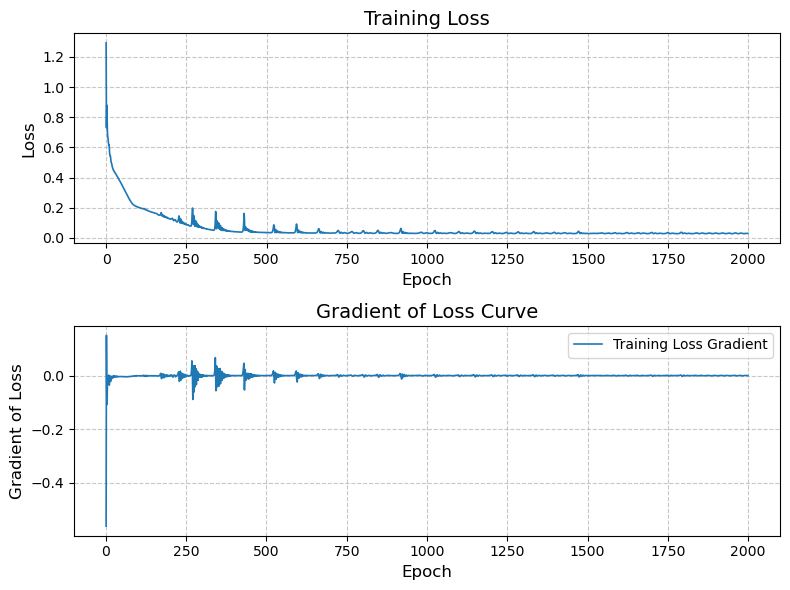

In [74]:
##### Compute Loss Gradient #####

losses_np = np.array(losses)

losses_diff = np.diff(losses_np)
epochs_diff = np.arange(1, len(losses_diff)+1)

##### Plot Loss Curve and Loss Gradient Curve #####

fig2, ax = plt.subplots(2, 1, figsize=(8, 6))

# --- Loss Curve ---
ax[0].plot(losses, label='Training Loss', linewidth=1.2)
ax[0].set_title('Training Loss', fontsize=14)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)

# --- Loss Gradient Curve ---
ax[1].plot(epochs_diff, losses_diff, label='Training Loss Gradient',  linewidth=1.2)
ax[1].set_title('Gradient of Loss Curve', fontsize=14)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Gradient of Loss', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()
plt.show()


Test MSE: 0.0531


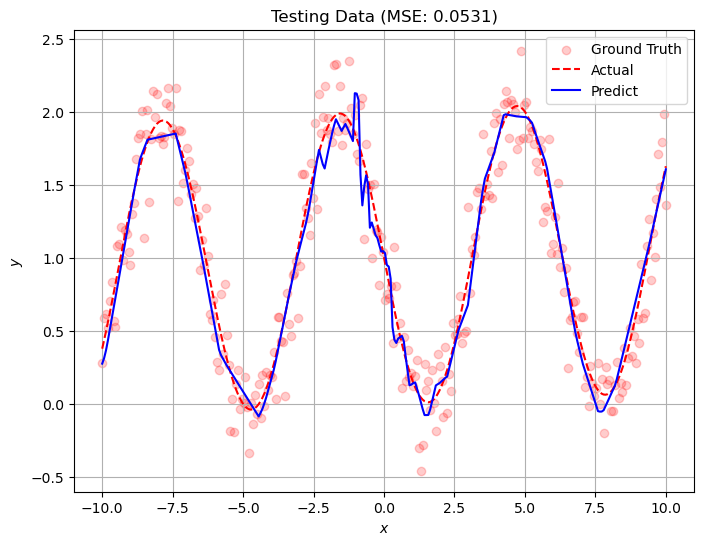

In [75]:
##### Evaluate the model #####
model.eval()

# Disable gradient calculation to save the memory (calculating it is completely useless)
with torch.no_grad():
    y_pred = model(x)

mse_test = criterion(y_pred, y_test).item()
print(f'Test MSE: {mse_test:.4f}')

fig3 = plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.2, label='Ground Truth')
plt.plot(x.numpy(), y_noiseless.numpy(), linestyle='--', c='red', label='Actual')
plt.plot(x.numpy(), y_pred.numpy(), c='blue', label='Predict')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.title(f'Testing Data (MSE: {mse_test:.4f})')
plt.show()

## LSTM

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [77]:
##### Form a model #####
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.ReLU(),
            nn.Linear(hidden_size * 4, hidden_size * 2),
            nn.ReLU(),
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
            )

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)  # lstm_out: (batch, seq_len, hidden)
        out = self.fc(lstm_out[:, -1, :])   # take last time step
        return out

**Make a dynamical model**
$$y[i] = 0.5(\mathrm{ReLU}(x[i-1]) + 2\mathrm{sinc}(2x[i-2]x[i-3]) + x[i-1]\cos(0.1y[i-2])) $$
where $y[0] = y[1] = y[2] = 1$.

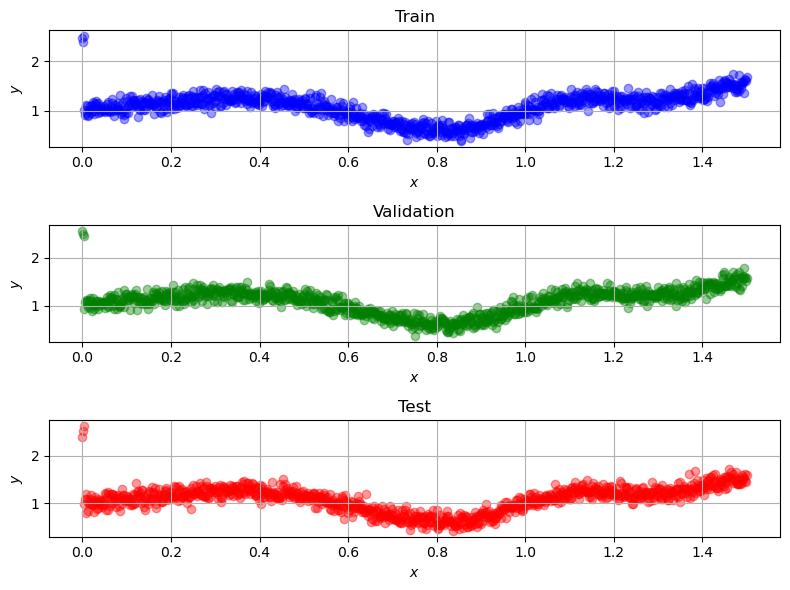

In [78]:
##### Input #####
idx = torch.arange(0, 1000)
x = torch.linspace(0, 1.5, 1000)

##### Output #####
y_noiseless = 2.5 * torch.ones(len(idx))
for i in range(3, len(idx)):
    y_noiseless[i] = 0.5 * (torch.relu(x[i-1]) + 2 * torch.sinc(2 * x[i-2] * x[i-3]) + x[i - 1] * torch.cos(0.1 * y_noiseless[i-2]))

torch.manual_seed(21)
y_train = y_noiseless +  0.1 * torch.randn(y_noiseless.shape)
y_val = y_noiseless + 0.1 * torch.randn(y_noiseless.shape)
y_test = y_noiseless + 0.1 * torch.randn(y_noiseless.shape)

##### Visualize #####
fig4, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].scatter(x.numpy(), y_train.numpy(), c='blue', alpha=0.4)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_title('Train')
ax[0].grid()

ax[1].scatter(x.numpy(), y_val.numpy(), c='green', alpha=0.4)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_title('Validation')
ax[1].grid()

ax[2].scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.4)
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title('Test')
ax[2].grid()


# plt.scatter(x.numpy(), y_train.numpy(), c='blue', alpha=0.4, label='Train')
# plt.scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.4, label='Test')

plt.tight_layout()
plt.show()


In [79]:
##### Make a sequence using a sliding window #####

window_size = 6

x_seq_train = []
y_seq_train = []
for i in range(window_size, len(x)):
    seq = y_train[i-window_size:i].unsqueeze(1)  # shape (window, 1)
    x_seq_train.append(seq)
    y_seq_train.append(y_train[i])  # predict next y

x_seq_val = []
y_seq_val = []
for i in range(window_size, len(x)):
    seq = y_val[i-window_size:i].unsqueeze(1)  # shape (window, 1)
    x_seq_val.append(seq)
    y_seq_val.append(y_val[i])  # predict next y

x_seq_test = []
y_seq_test = []    
for i in range(window_size, len(x)):
    seq = y_test[i-window_size:i].unsqueeze(1)  # shape (window, 1)
    x_seq_test.append(seq)
    y_seq_test.append(y_test[i])  # predict next y

x_seq_train = torch.stack(x_seq_train).float()  # shape: [N, window, 1]
x_seq_val = torch.stack(x_seq_val).float()
x_seq_test = torch.stack(x_seq_test).float()
y_seq_train = torch.stack(y_seq_train).float().unsqueeze(1)  # [N, 1]
y_seq_val = torch.stack(y_seq_val).float().unsqueeze(1)
y_seq_test = torch.stack(y_seq_test).float().unsqueeze(1)

# ----- Dataset and dataloader -----
train_dataset = TensorDataset(x_seq_train, y_seq_train)
val_dataset = TensorDataset(x_seq_val, y_seq_val)
test_dataset = TensorDataset(x_seq_test, y_seq_test)
train_dataloader = DataLoader(train_dataset, batch_size=50, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=50, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=50, shuffle=False)

In [80]:
##### Train the model #####
torch.manual_seed(21)

model = LSTM()
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

max_epochs = 500
train_losses = []
val_losses = []

#### Adding an Early stopping and Scheduler into the training process #####
early_stop_count = 0    
patience = 5        
min_val_loss = float('inf')


#### In each iteration/epoch has training process and validation process (for early stopping) #####
best_model = model.state_dict()  # Initialize best_model

for epoch in range(max_epochs):
    
    # Train
    model.train()
    train_loss = []
    for batch in train_dataloader:
        x_batch, y_batch = batch
        optimizer.zero_grad()
        y_batch_pred = model(x_batch)
        loss = criterion(y_batch_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

    train_loss = np.mean(train_loss)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = []
    with torch.no_grad():
        for batch in val_dataloader:
            x_batch, y_batch = batch
            y_batch_pred = model(x_batch)
            loss = criterion(y_batch_pred, y_batch)
            val_loss.append(loss.item())

    val_loss = np.mean(val_loss)
    val_losses.append(val_loss)

    if val_loss < min_val_loss:
        best_model = model.state_dict()
        min_val_loss = val_loss
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count >= patience: 
        print('Early Stopping!')
        break
    
    print(f'Epoch {epoch+1} | Train Loss: {train_loss: .4f} | Val Loss: {val_loss: .4f}')

model.load_state_dict(best_model)  # Load the best model

Epoch 1 | Train Loss:  0.6600 | Val Loss:  0.0663
Epoch 2 | Train Loss:  0.0779 | Val Loss:  0.0430
Epoch 3 | Train Loss:  0.0399 | Val Loss:  0.0390
Epoch 4 | Train Loss:  0.0336 | Val Loss:  0.0310
Epoch 5 | Train Loss:  0.0252 | Val Loss:  0.0194
Epoch 6 | Train Loss:  0.0155 | Val Loss:  0.0134
Epoch 7 | Train Loss:  0.0131 | Val Loss:  0.0129
Epoch 8 | Train Loss:  0.0126 | Val Loss:  0.0121
Epoch 9 | Train Loss:  0.0125 | Val Loss:  0.0120
Epoch 10 | Train Loss:  0.0124 | Val Loss:  0.0119
Epoch 11 | Train Loss:  0.0122 | Val Loss:  0.0130
Epoch 12 | Train Loss:  0.0128 | Val Loss:  0.0131
Epoch 13 | Train Loss:  0.0125 | Val Loss:  0.0131
Epoch 14 | Train Loss:  0.0127 | Val Loss:  0.0117
Epoch 15 | Train Loss:  0.0126 | Val Loss:  0.0143
Epoch 16 | Train Loss:  0.0129 | Val Loss:  0.0117
Epoch 17 | Train Loss:  0.0120 | Val Loss:  0.0123
Epoch 18 | Train Loss:  0.0124 | Val Loss:  0.0126
Early Stopping!


<All keys matched successfully>

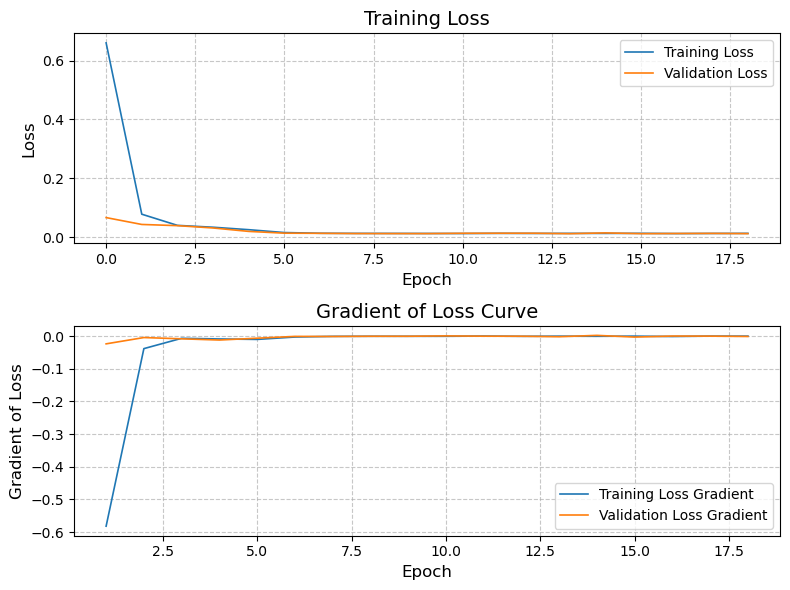

In [81]:
##### Compute Loss Gradient #####

train_losses_np = np.array(train_losses)
val_losses_np = np.array(val_losses)

train_losses_diff = np.diff(train_losses_np)
val_losses_diff = np.diff(val_losses_np)
epochs_diff = np.arange(1, len(train_losses_diff)+1)

##### Plot Loss Curve and Loss Gradient Curve #####

fig5, ax = plt.subplots(2, 1, figsize=(8, 6))

# --- Loss Curve ---
ax[0].plot(train_losses_np, label='Training Loss', linewidth=1.2)
ax[0].plot(val_losses_np, label='Validation Loss', linewidth=1.2)
ax[0].set_title('Training Loss', fontsize=14)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# --- Loss Gradient Curve ---
ax[1].plot(epochs_diff, train_losses_diff, label='Training Loss Gradient',  linewidth=1.2)
ax[1].plot(epochs_diff, val_losses_diff, label='Validation Loss Gradient',  linewidth=1.2)
ax[1].set_title('Gradient of Loss Curve', fontsize=14)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Gradient of Loss', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()
plt.show()

Test MSE: 0.0131


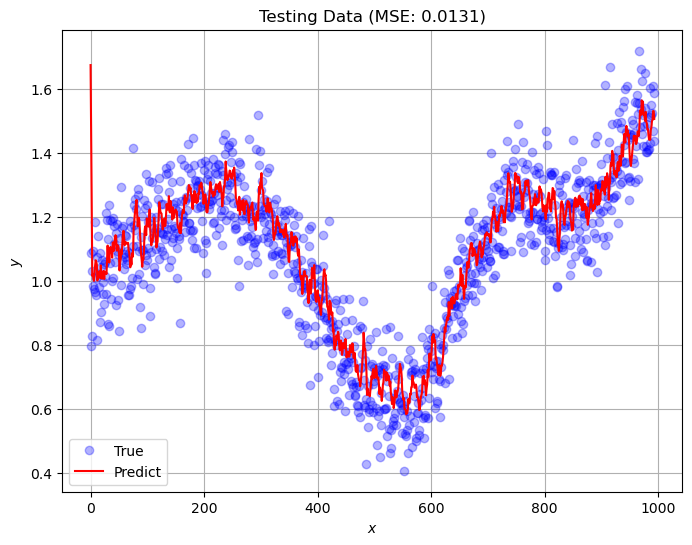

In [82]:
##### Evaluate the model #####
model.eval()

y_true = []
y_preds = []

# Disable gradient calculation to save memory and speed up computations
with torch.no_grad():
    for batch in test_dataloader:
        x_batch, y_batch = batch
        y_pred = model(x_batch)
        y_preds.append(y_pred)
        y_true.append(y_batch)

# Concatenate all batches
y_pred_all = torch.cat(y_preds, dim=0)
y_true_all = torch.cat(y_true, dim=0)

# Compute MSE
mse_test = criterion(y_pred_all, y_true_all).item()
print(f'Test MSE: {mse_test:.4f}')

# Plot predictions vs true values
fig6 = plt.figure(figsize=(8, 6))
plt.plot(y_true_all.numpy(), 'o', c='blue', alpha=0.3, label='True')
plt.plot(y_pred_all.numpy(), c='red', alpha=1, label='Predict')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.title(f'Testing Data (MSE: {mse_test:.4f})')
plt.show()

## Transformer

In [83]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Positional Encoding

The positional encoding is used to give the model information about the position of each token in the sequence. It is defined as:
$$\text{PE}_{(\text{pos}, 2i)} = \sin\left(\frac{\text{pos}}{10000^{2i/d_\text{model}}}\right)$$
$$\text{PE}_{(\text{pos}, 2i+1)} = \cos\left(\frac{\text{pos}}{10000^{2i/d_\text{model}}}\right)$$
where $\text{pos}$ is the position of the token in the sequence, $i$ is the dimension index, and $d_\text{model}$ is the dimensionality of the model.

In [84]:
##### Construct the model #####

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)       # size: (max_len, 1)
        div_term = 1/10000 ** (torch.arange(0, d_model, 2).float() / d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0).transpose(0, 1)
        
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
    
class TransformerModel(nn.Module):
    def __init__(self, input_dim=1, d_model=16, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()

        self.encoder = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.ReLU(),
            nn.Linear(d_model * 4, d_model * 2),
            nn.ReLU(),
            nn.Linear(d_model * 2, d_model),
            nn.ReLU(),
            nn.Linear(d_model, 1)
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.fc(x[:, -1, :])
        return x

Make a dynamical model
$$y[i] = 0.5(\mathrm{ReLU}(x[i-1]) + 2\mathrm{sinc}(2x[i-2]x[i-3]) + x[i-1]\cos(0.1y[i-2])) $$
where $y[0] = y[1] = y[2] = 1$.

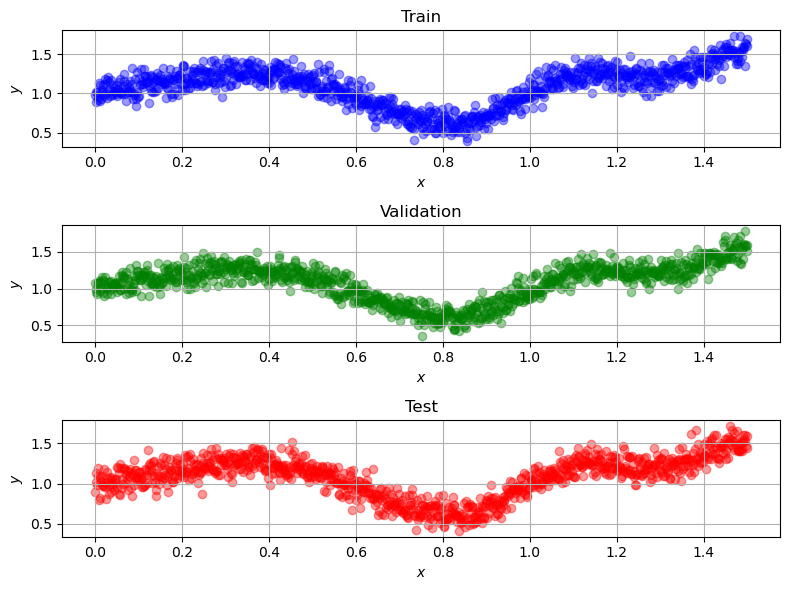

In [85]:
##### Input #####
idx = torch.arange(0, 1000)
x = torch.linspace(0, 1.5, 1000)

##### Output #####
y_noiseless = 1 * torch.ones(len(x))
for i in range(3, len(x)):
    y_noiseless[i] = 0.5 * (torch.relu(x[i-1]) + 2 * torch.sinc(2 * x[i-2] * x[i-3]) + x[i - 1] * torch.cos(0.1 * y_noiseless[i-2]))
torch.manual_seed(21)
y_train = y_noiseless +  0.1 * torch.randn(y_noiseless.shape)
y_val = y_noiseless + 0.1 * torch.randn(y_noiseless.shape)
y_test = y_noiseless + 0.1 * torch.randn(y_noiseless.shape)

##### Visualize #####
fig7, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].scatter(x.numpy(), y_train.numpy(), c='blue', alpha=0.4)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_title('Train')
ax[0].grid()

ax[1].scatter(x.numpy(), y_val.numpy(), c='green', alpha=0.4)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_title('Validation')
ax[1].grid()

ax[2].scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.4)
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title('Test')
ax[2].grid()


# plt.scatter(x.numpy(), y_train.numpy(), c='blue', alpha=0.4, label='Train')
# plt.scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.4, label='Test')

plt.tight_layout()
plt.show()

In [86]:
##### Make a sequence using a sliding window #####

window_size = 6

x_seq_train = []
y_seq_train = []
for i in range(window_size, len(x)):
    seq = y_train[i-window_size:i].unsqueeze(1)  # shape (window, 1)
    x_seq_train.append(seq)
    y_seq_train.append(y_train[i])  # predict next y

x_seq_val = []
y_seq_val = []
for i in range(window_size, len(x)):
    seq = y_val[i-window_size:i].unsqueeze(1)  # shape (window, 1)
    x_seq_val.append(seq)
    y_seq_val.append(y_val[i])  # predict next y

x_seq_test = []
y_seq_test = []    
for i in range(window_size, len(x)):
    seq = y_test[i-window_size:i].unsqueeze(1)  # shape (window, 1)
    x_seq_test.append(seq)
    y_seq_test.append(y_test[i])  # predict next y

x_seq_train = torch.stack(x_seq_train).float()  # shape: [N, window, 1]
x_seq_val = torch.stack(x_seq_val).float()
x_seq_test = torch.stack(x_seq_test).float()
y_seq_train = torch.stack(y_seq_train).float().unsqueeze(1)  # [N, 1]
y_seq_val = torch.stack(y_seq_val).float().unsqueeze(1)
y_seq_test = torch.stack(y_seq_test).float().unsqueeze(1)

# ----- Dataset and dataloader -----
train_dataset = TensorDataset(x_seq_train, y_seq_train)
val_dataset = TensorDataset(x_seq_val, y_seq_val)
test_dataset = TensorDataset(x_seq_test, y_seq_test)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [87]:
##### Train the model #####
torch.manual_seed(21)
model = TransformerModel()
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

max_epochs = 100
train_losses = []
val_losses = []

#### Adding an Early stopping and Scheduler into the training process #####
early_stop_count = 0    
patience = 5        
min_val_loss = float('inf')

#### In each iteration/epoch has training process and validation process (for early stopping) #####

best_model = model.state_dict()  # Initialize best_model
for epoch in range(max_epochs):
    # Train
    model.train()
    train_loss = []
    for batch in train_dataloader:
        x_batch, y_batch = batch
        optimizer.zero_grad()
        y_batch_pred = model(x_batch)
        loss = criterion(y_batch_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

    train_loss = np.mean(train_loss)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = []
    with torch.no_grad():
        for batch in val_dataloader:
            x_batch, y_batch = batch
            y_batch_pred = model(x_batch)
            loss = criterion(y_batch_pred, y_batch)
            val_loss.append(loss.item())

    val_loss = np.mean(val_loss)
    val_losses.append(val_loss)

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        early_stop_count = 0
        best_model = model.state_dict()
    else:
        early_stop_count += 1

    if early_stop_count >= patience: 
        print('Early Stopping!')
        break
    
    print(f'Epoch {epoch} | Train Loss: {train_loss: .4f} | Val Loss: {val_loss: .4f}')

model.load_state_dict(best_model)  # Load the best model

c:\Users\YotsapatSK140\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0 | Train Loss:  1.0891 | Val Loss:  0.7312
Epoch 1 | Train Loss:  0.2485 | Val Loss:  0.1259
Epoch 2 | Train Loss:  0.1000 | Val Loss:  0.1952
Epoch 3 | Train Loss:  0.1678 | Val Loss:  0.0833
Epoch 4 | Train Loss:  0.1404 | Val Loss:  0.0812
Epoch 5 | Train Loss:  0.1197 | Val Loss:  0.0739
Epoch 6 | Train Loss:  0.1202 | Val Loss:  0.0745
Epoch 7 | Train Loss:  0.1200 | Val Loss:  0.0743
Epoch 8 | Train Loss:  0.1213 | Val Loss:  0.0740
Epoch 9 | Train Loss:  0.1145 | Val Loss:  0.0736
Epoch 10 | Train Loss:  0.1154 | Val Loss:  0.0738
Epoch 11 | Train Loss:  0.1134 | Val Loss:  0.0732
Epoch 12 | Train Loss:  0.1138 | Val Loss:  0.0734
Epoch 13 | Train Loss:  0.1118 | Val Loss:  0.0729
Epoch 14 | Train Loss:  0.1125 | Val Loss:  0.0731
Epoch 15 | Train Loss:  0.1125 | Val Loss:  0.0725
Epoch 16 | Train Loss:  0.1152 | Val Loss:  0.0726
Epoch 17 | Train Loss:  0.1110 | Val Loss:  0.0703
Epoch 18 | Train Loss:  0.1055 | Val Loss:  0.0664
Epoch 19 | Train Loss:  0.1135 | Val Loss

<All keys matched successfully>

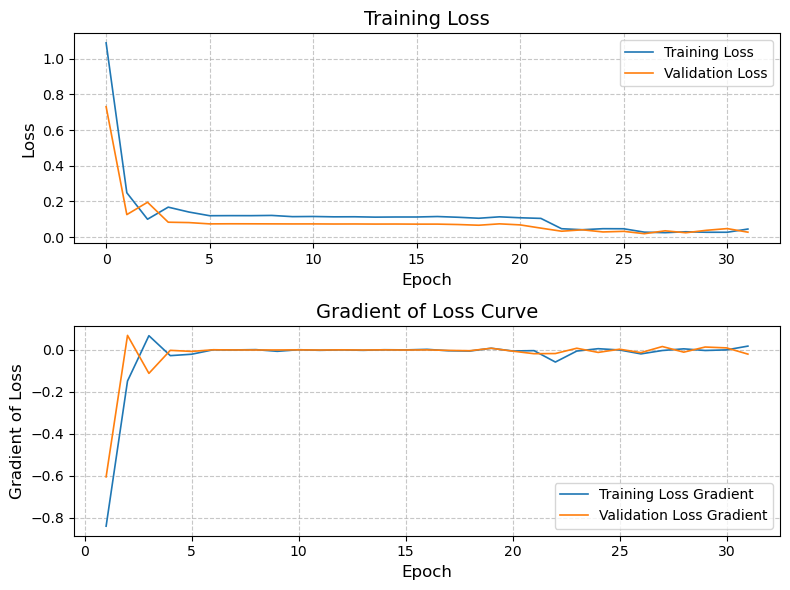

In [88]:
##### Compute Loss Gradient #####

train_losses_np = np.array(train_losses)
val_losses_np = np.array(val_losses)

train_losses_diff = np.diff(train_losses_np)
val_losses_diff = np.diff(val_losses_np)
epochs_diff = np.arange(1, len(train_losses_diff)+1)

##### Plot Loss Curve and Loss Gradient Curve #####

fig8, ax = plt.subplots(2, 1, figsize=(8, 6))

# --- Loss Curve ---
ax[0].plot(train_losses_np, label='Training Loss', linewidth=1.2)
ax[0].plot(val_losses_np, label='Validation Loss', linewidth=1.2)
ax[0].set_title('Training Loss', fontsize=14)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# --- Loss Gradient Curve ---
ax[1].plot(epochs_diff, train_losses_diff, label='Training Loss Gradient',  linewidth=1.2)
ax[1].plot(epochs_diff, val_losses_diff, label='Validation Loss Gradient',  linewidth=1.2)
ax[1].set_title('Gradient of Loss Curve', fontsize=14)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Gradient of Loss', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()
plt.show()

Test MSE: 0.0280


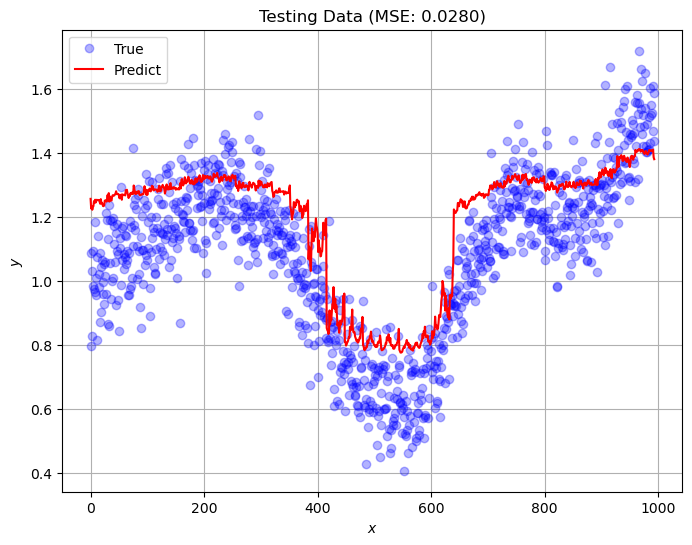

In [89]:
##### Evaluate the model #####
model.eval()

y_true = []
y_preds = []

# Disable gradient calculation to save memory and speed up computations
with torch.no_grad():
    for batch in test_dataloader:
        x_batch, y_batch = batch
        y_pred = model(x_batch)
        y_preds.append(y_pred)
        y_true.append(y_batch)

# Concatenate all batches
y_pred_all = torch.cat(y_preds, dim=0)
y_true_all = torch.cat(y_true, dim=0)

# Compute MSE
mse_test = criterion(y_pred_all, y_true_all).item()
print(f'Test MSE: {mse_test:.4f}')

# Plot predictions vs true values
fig9 = plt.figure(figsize=(8, 6))
plt.plot(y_true_all.numpy(), 'o', c='blue', alpha=0.3, label='True')
plt.plot(y_pred_all.numpy(), c='red', alpha=1, label='Predict')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.title(f'Testing Data (MSE: {mse_test:.4f})')
plt.show()

#### Save figures


In [91]:
fig1.savefig('basic_dataset_fig1.pdf', bbox_inches='tight')
fig2.savefig('basic_dataset_fig2.pdf', bbox_inches='tight')
fig3.savefig('basic_dataset_fig3.pdf', bbox_inches='tight')
fig4.savefig('basic_dataset_fig4.pdf', bbox_inches='tight')
fig5.savefig('basic_dataset_fig5.pdf', bbox_inches='tight')
fig6.savefig('basic_dataset_fig6.pdf', bbox_inches='tight')
fig7.savefig('basic_dataset_fig7.pdf', bbox_inches='tight')
fig8.savefig('basic_dataset_fig8.pdf', bbox_inches='tight')
fig9.savefig('basic_dataset_fig9.pdf', bbox_inches='tight')